In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [6]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


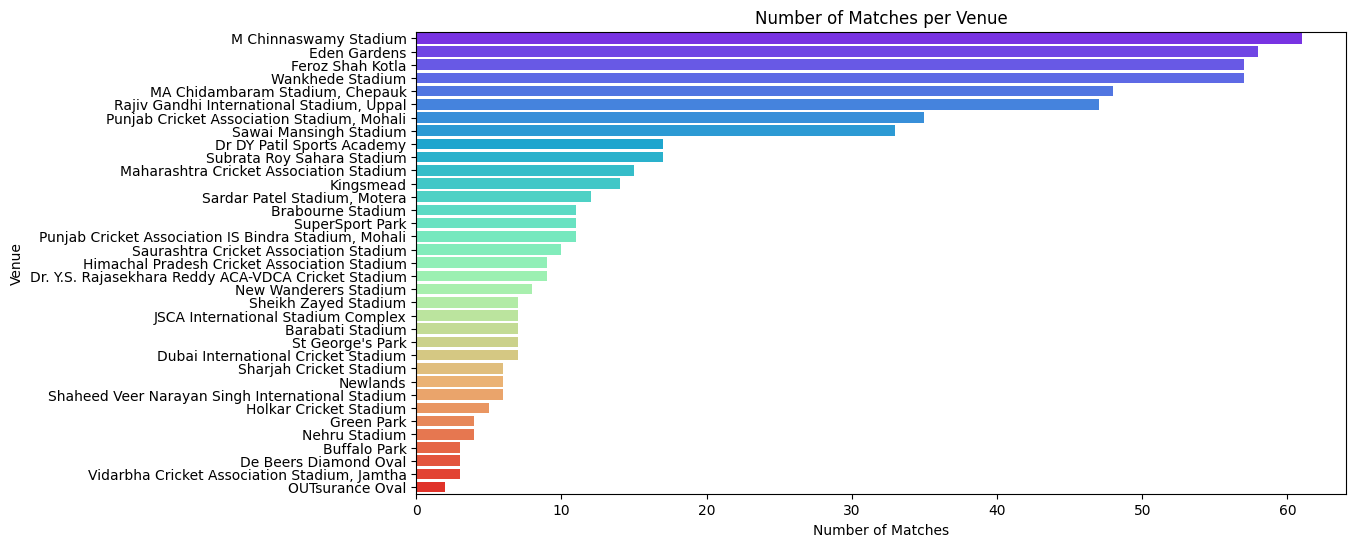

In [7]:
data = ipl.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=matches_count.values,
            y=matches_count.index,
            hue=matches_count.index,
            palette='rainbow',
            legend=False)
plt.title("Number of Matches per Venue")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()

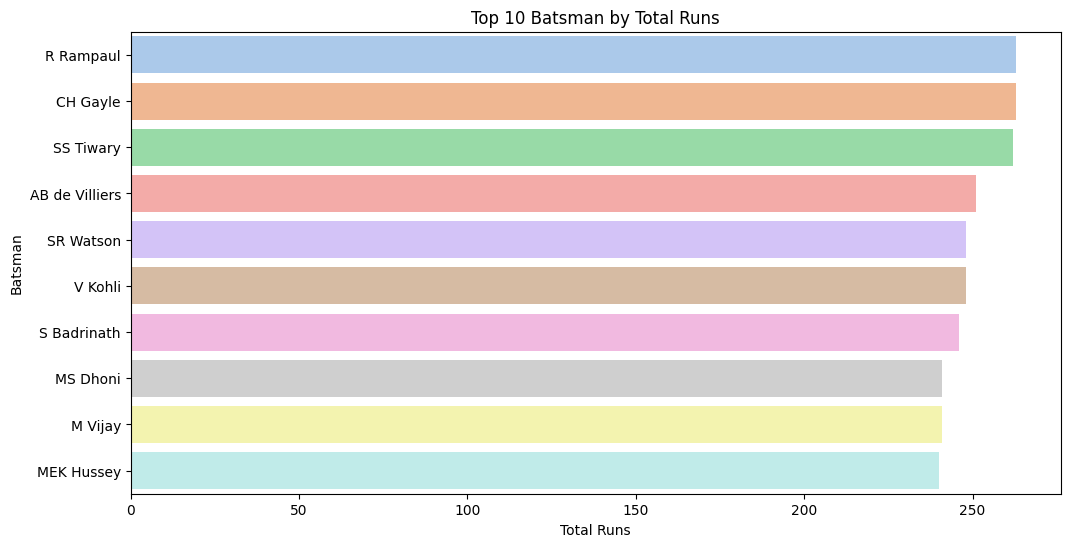

In [8]:
runs_by_batsman = data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values,
            y=runs_by_batsman.index,
            hue=runs_by_batsman.index,
            palette='pastel',
            legend=False)
plt.title("Top 10 Batsman by Total Runs")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()

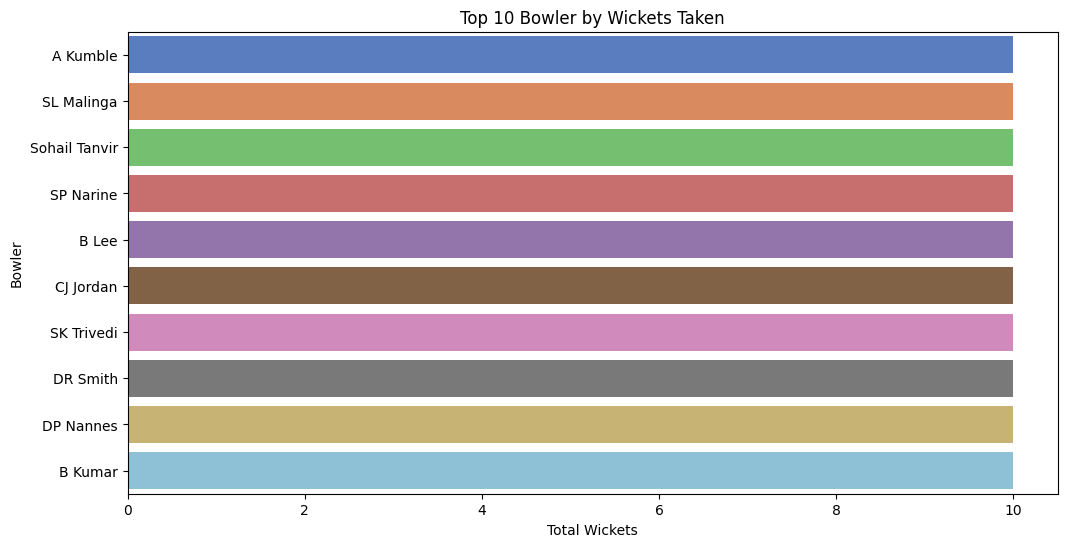

In [9]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values,
            y=wickets_by_bowler.index,
            hue=wickets_by_bowler.index,
            palette='muted',
            legend=False)
plt.title("Top 10 Bowler by Wickets Taken")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder 

cat_cols = ['bat_team', 'bowl_team', 'venue', 'batsman', 'bowler']

data_encoded = data.copy()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

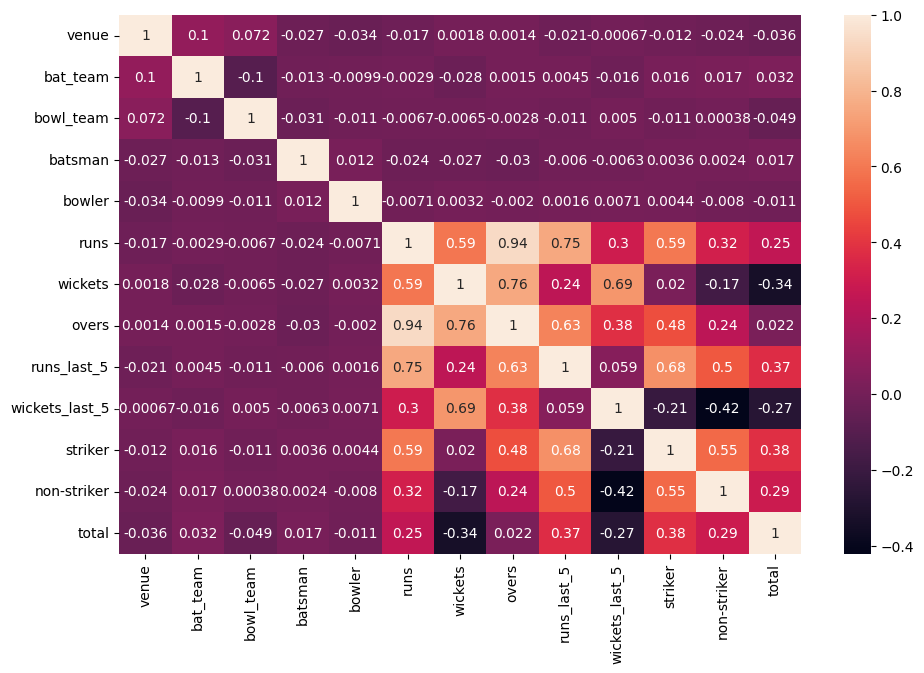

In [11]:
data_corr = data_encoded.drop(columns=['date','mid'], axis=1)
plt.figure(figsize=(11, 7))
sns.heatmap(data_corr.corr(), annot=True)
plt.show()

In [12]:
feature_cols = ['bat_team', 'bowl_team', 'batsman', 'bowler', 'runs', 'wickets', 'overs', 'striker', 'venue']

X = data_encoded[feature_cols]
Y = data_encoded['total']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [14]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [15]:
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, Y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 49.9505 - val_loss: 14.8320
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 15.0226 - val_loss: 14.4254
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.7489 - val_loss: 14.2092
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.6011 - val_loss: 14.1666
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.5717 - val_loss: 14.1362
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.3932 - val_loss: 14.0388
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 14.3582 - val_loss: 13.8368
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.2307 - val_loss: 13.8040
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.3040 - val_loss: 13.9860
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.0859 - val_loss: 13.7405


<Axes: >

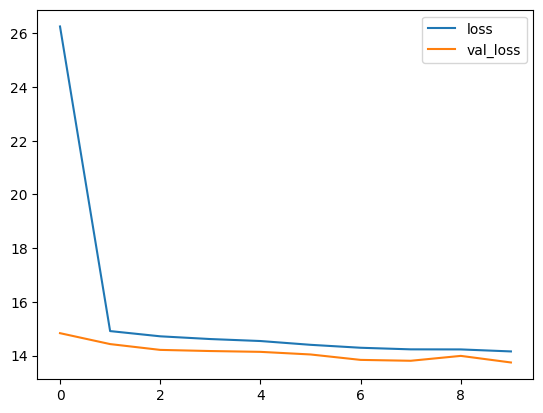

In [16]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [17]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(Y_test, predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


14.23067855834961

In [20]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings 
warnings.filterwarnings('ignore')

venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_),
                         description="Select Venue: ")
venue.style = {'description_width': 'initial'}

batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_),
                                description="Select Batting Team: ")
batting_team.style = {'description_width': 'initial'}

bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_),
                                description="Select Bowling Team: ")
bowling_team.style = {'description_width': 'initial'}

striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_),
                            description="Select Striker: ")
striker.style = {'description_width': 'initial'}

bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_),
                          description="Select Bowler: ")
bowler.style = {'description_width': 'initial'}

runs = widgets.IntText(value=0, description='Runs: ', style={'description_width': 'initial'})

wickets = widgets.IntText(value=0, description='Wickets: ', style={'description_width': 'initial'})

overs = widgets.IntText(value=0, description='Overs: ', style={'description_width': 'initial'})

striker_ind = widgets.IntText(value=0, description='Stiker: ', style={'description': 'initial'})

predict_button = widgets.Button(description='Predict Score')


output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()
        
        encoded_venue = label_encoders['venue'].transform([venue.value])[0]
        encoded_batting_team = label_encoders['bat_team'].transform([batting_team.value])[0]
        encoded_bowling_team = label_encoders['bowl_team'].transform([bowling_team.value])[0]
        encoded_striker = label_encoders['batsman'].transform([striker.value])[0]
        encoded_bowler = label_encoders['bowler'].transform([bowler.value])[0]
        
        input_features = [
            encoded_batting_team,
            encoded_bowling_team,
            encoded_venue,
            runs.value,
            striker_ind.value,
            encoded_striker,
            encoded_bowler
        ]
        
        input_array = np.array(input_features).reshape(-1, 1)
        input_array = scaler.transform(input_array)
        predicted_score = model.predict(input_array)
        
        print(f"Predicted Total Runs: {int(predicted_score[0])}")
        
predict_button.on_click(predict_score)

display(venue, batting_team, bowling_team, striker, bowler, runs, wickets, overs, striker_ind, predict_button, output)

Dropdown(description='Select Venue: ', options=('Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De B…

Dropdown(description='Select Batting Team: ', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Darede…

Dropdown(description='Select Bowling Team: ', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Darede…

Dropdown(description='Select Striker: ', options=('A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary', '…

Dropdown(description='Select Bowler: ', options=('A Ashish Reddy', 'A Chandila', 'A Choudhary', 'A Flintoff', …

IntText(value=0, description='Runs: ', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Wickets: ', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Overs: ', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Stiker: ')

Button(description='Predict Score', style=ButtonStyle())

Output()